<a href="https://colab.research.google.com/github/CodeVerse-team/python-for-data-analysis-learning-libraries/blob/main/Data%20Cleaning/(Data%20Cleaning%206)%20Reading%20CSV%20Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading CSV and TXT files

Rather than creating `Series` or `DataFrames` strutures from scratch, or even from Python core sequences or `ndarrays`, the most typical use of `pandas` is based on the loading of information from files or sources of information for further exploration, transformation and analysis.

In this lecture we'll learn how to read comma-separated values files (.csv) and raw text files (.txt) into pandas `DataFrames`.

In [5]:
import pandas as pd

## Reading Data with Python

As we saw on previous courses we can read data simply using Python.

When you want to work with a file, the first thing to do is to open it. This is done by invoking the `open()` built-in function.

`open()` has a single required argument that is the path to the file and has a single return, the file object.

The `with` statement automatically takes care of closing the file once it leaves the `with` block, even in cases of error.

In [6]:
with open('btc-market-price.csv', 'r') as fp:
  print(fp)

<_io.TextIOWrapper name='btc-market-price.csv' mode='r' encoding='utf-8'>


Once the ile is opened, we can read it's content as follows:

In [7]:
with open('btc-market-price.csv', 'r') as fp:
  for index, line in enumerate(fp.readlines()):
    #reads just the first 10 lines
    if (index < 10):
      print(index, line)

0 2/4/17 0:00,1099.169125

1 3/4/17 0:00,1141.813

2 4/4/17 0:00,?

3 5/4/17 0:00,1133.079314

4 6/4/17 0:00,-

5 7/4/17 0:00,-

6 8/4/17 0:00,1181.149838

7 9/4/17 0:00,1208.8005

8 10/4/17 0:00,1207.744875

9 11/4/17 0:00,1226.617038



How can we process the data read from the file using pure Python? it involves a lot of manual work, for example, splitting the values by the correct separator:

In [8]:
with open('btc-market-price.csv', 'r') as fp:
  for index, line in enumerate(fp.readlines()):
    #again reads the first 10 lines
    if (index < 10):
      timestamp, price = line.split(',')
      print(f"{timestamp}: ${price}")

2/4/17 0:00: $1099.169125

3/4/17 0:00: $1141.813

4/4/17 0:00: $?

5/4/17 0:00: $1133.079314

6/4/17 0:00: $-

7/4/17 0:00: $-

8/4/17 0:00: $1181.149838

9/4/17 0:00: $1208.8005

10/4/17 0:00: $1207.744875

11/4/17 0:00: $1226.617038



But what happens if the separator is unknown, like in the file `exam_review.csv`:

In [9]:
!head exam_review.csv

first_name>last_name>age>math_score>french_score
Ray>Morley>18>"68,000">"75,000"
Melvin>Scott>24>77>83
Amirah>Haley>22>92>67

Gerard>Mills>19>"78,000">72
Amy>Grimes>23>91>81


In this case, the separator is not a comma, but the `>` sign, It's still a "CSV", although not technically separated by commas.

## The `CSV` module

Python includes the builtin module `csv` that helps a little bit more with the process of reading CSVs:

In [10]:
import csv

In [11]:
with open('btc-market-price.csv', 'r') as fp:
    reader = csv.reader(fp)
    for index, (timestamp, price) in enumerate(reader):
      # Read just the first 10 lines
      if (index < 10):
        print(f"{timestamp}: ${price}")

2/4/17 0:00: $1099.169125
3/4/17 0:00: $1141.813
4/4/17 0:00: $?
5/4/17 0:00: $1133.079314
6/4/17 0:00: $-
7/4/17 0:00: $-
8/4/17 0:00: $1181.149838
9/4/17 0:00: $1208.8005
10/4/17 0:00: $1207.744875
11/4/17 0:00: $1226.617038


The `CSV` modules takes care of splitting the ile using a given sperarator (called `Delimitter`) and creating an iterator for us.

In [12]:
with open ('exam_review.csv', 'r') as fp:
  reader = csv.reader(fp, delimiter = '>') # special delimiter
  next(reader) # skipping header
  for index, values in enumerate(reader):
    if not values:
      continue # skip empty lines
    fname, lname, age, math, french = values
    print(f"Name: {fname} {lname}")
    print(f"Age: {age}")
    print(f"Math Score: {math}")
    print(f"French Score: {french}")

Name: Ray Morley
Age: 18
Math Score: 68,000
French Score: 75,000
Name: Melvin Scott
Age: 24
Math Score: 77
French Score: 83
Name: Amirah Haley
Age: 22
Math Score: 92
French Score: 67
Name: Gerard Mills
Age: 19
Math Score: 78,000
French Score: 72
Name: Amy Grimes
Age: 23
Math Score: 91
French Score: 81


#Reading data with Pandas

Probably one of the most recurrent types of work for data analysis: public data sources, logs, historical information tables, exports from databases. So the pandas library offers us functions to read and write files in multiple formats like CSV, JSON, XML and Excel's XLSX, all of them creating a DataFrame with the information read from the file.

We'll learn how to read different type of data including:

*  CSV files (.csv)
*  Raw text files (.txt)
*  JSON data from a file and from an API
*  Data from a SQL query over a database

There are many other available reading functions as the following table shows:

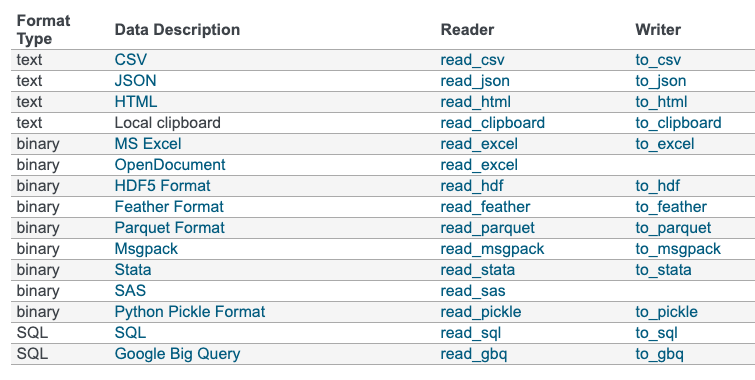

